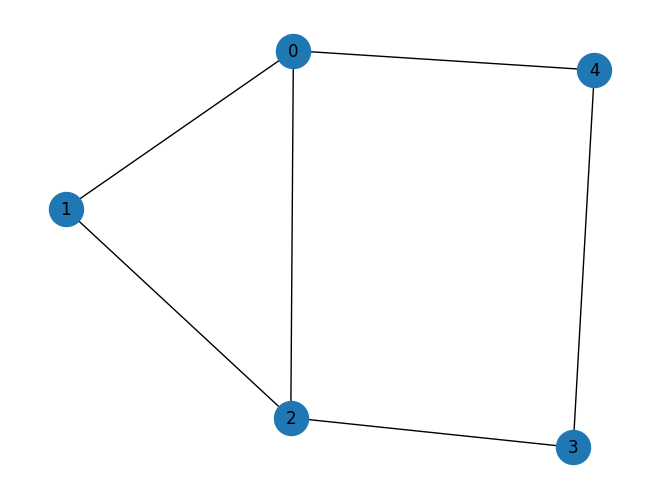

In [1]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np

n = 5

graph = rx.PyGraph()
graph.add_nodes_from(np.arange(0, n, 1))
# edge_list = [(0, 1, 1.0), (1, 2, 1.0), (2, 3, 1.0), (3, 0, 1.0)]
edge_list = [(0, 1, 1.0), (0, 2, 1.0), (0, 4, 1.0), (1, 2, 1.0), (2, 3, 1.0), (3, 4, 1.0)]
graph.add_edges_from(edge_list)
draw_graph(graph, node_size=600, with_labels=True)

# Construct problem in QUBO and converting it to a Hamiltonian

In [2]:
from qiskit.quantum_info import SparsePauliOp
def build_max_cut_paulis(graph: rx.PyGraph) -> list[tuple[str, float]]:
    """Convert the graph to Pauli list.

    This function does the inverse of `build_max_cut_graph`
    """
    pauli_list = []
    for edge in list(graph.edge_list()):
        paulis = ["I"] * len(graph)
        paulis[edge[0]], paulis[edge[1]] = "Z", "Z"

        weight = graph.get_edge_data(edge[0], edge[1])

        pauli_list.append(("".join(paulis)[::-1], weight))

    return pauli_list

max_cut_paulis = build_max_cut_paulis(graph)

print(max_cut_paulis)

cost_hamiltonian = SparsePauliOp.from_list(max_cut_paulis)
print("Cost Function Hamiltonian:", cost_hamiltonian)

[('IIIZZ', 1.0), ('IIZIZ', 1.0), ('ZIIIZ', 1.0), ('IIZZI', 1.0), ('IZZII', 1.0), ('ZZIII', 1.0)]
Cost Function Hamiltonian: SparsePauliOp(['IIIZZ', 'IIZIZ', 'ZIIIZ', 'IIZZI', 'IZZII', 'ZZIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])


# checking for hamiltonian implementation parity

In [3]:
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import Statevector
from qiskit import *

# import tensorsim
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../tensor_method_w2')))

from tensor_sim import TensorSim
from gate_sim_gates import *

# check hamiltonian from qiskit
qc = QuantumCircuit(n)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.h(4)
initial_state = Statevector.from_instruction(qc)
transformed_state = cost_hamiltonian.to_matrix() @ initial_state.data
# print("Transformed Statevector (via H):")
# print(transformed_state)

# check my circuit
myqc = TensorSim("00000")
myqc.apply_1q_gate(H, 0)
myqc.apply_1q_gate(H, 1)
myqc.apply_1q_gate(H, 2)
myqc.apply_1q_gate(H, 3)
myqc.apply_1q_gate(H, 4)
myqc.apply_hamiltonian_from_list(max_cut_paulis)
my_transformed_state = myqc.get_state_vector()

print("maximum difference between hamiltonians")
print(np.max(np.abs(my_transformed_state - transformed_state)))

maximum difference between hamiltonians
3.33066907387547e-16


# create a QAOA circuit

In [ ]:
def construct_qc()

Final state amplitudes:
|00000⟩: 0.75*sqrt(2)
|00010⟩: 0.25*sqrt(2)
|00101⟩: -0.25*sqrt(2)
|00111⟩: 0.25*sqrt(2)
|01000⟩: 0.25*sqrt(2)
|01001⟩: -0.5*sqrt(2)
|01010⟩: -0.25*sqrt(2)
|01011⟩: -0.5*sqrt(2)
|01101⟩: -0.25*sqrt(2)
|01111⟩: 0.25*sqrt(2)
|10000⟩: 0.25*sqrt(2)
|10010⟩: -0.25*sqrt(2)
|10100⟩: -0.5*sqrt(2)
|10101⟩: -0.25*sqrt(2)
|10110⟩: -0.5*sqrt(2)
|10111⟩: 0.25*sqrt(2)
|11000⟩: 0.25*sqrt(2)
|11010⟩: -0.25*sqrt(2)
|11101⟩: 0.25*sqrt(2)
|11111⟩: 0.75*sqrt(2)

Final state probabilities:
|00000⟩: 1.12500000000000
|00010⟩: 0.125000000000000
|00101⟩: 0.125000000000000
|00111⟩: 0.125000000000000
|01000⟩: 0.125000000000000
|01001⟩: 0.500000000000000
|01010⟩: 0.125000000000000
|01011⟩: 0.500000000000000
|01101⟩: 0.125000000000000
|01111⟩: 0.125000000000000
|10000⟩: 0.125000000000000
|10010⟩: 0.125000000000000
|10100⟩: 0.500000000000000
|10101⟩: 0.125000000000000
|10110⟩: 0.500000000000000
|10111⟩: 0.125000000000000
|11000⟩: 0.125000000000000
|11010⟩: 0.125000000000000
|11101⟩: 0.125000